In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv('bank-full.csv', sep=';')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
#Find the no of rows and column
df.shape

(45211, 17)

In [5]:
#find any null value is there or not
df.isnull().value_counts()

age    job    marital  education  default  balance  housing  loan   contact  day    month  duration  campaign  pdays  previous  poutcome  y    
False  False  False    False      False    False    False    False  False    False  False  False     False     False  False     False     False    45211
dtype: int64

In [6]:
#data types
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

# Data Analysis

In [7]:
#Term deposite is a deposite that banks offer a fixed rate of interest in which your money will return in specific mature time
#here deposite term is y where customer deposite or not 

In [8]:
#Described here numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
#Find unique values
for col in df.select_dtypes('object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


# EDA PART

In [10]:
#There is no unwanted column

In [11]:
#find any null value is there or not
df.isnull().value_counts()

age    job    marital  education  default  balance  housing  loan   contact  day    month  duration  campaign  pdays  previous  poutcome  y    
False  False  False    False      False    False    False    False  False    False  False  False     False     False  False     False     False    45211
dtype: int64

In [12]:
#there is no unique values
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [13]:
#Explore Categorical Variableb
cat_fe=[feature for feature in df.columns if((df[feature].dtypes=='object')&(feature not in['y']))]
cat_fe

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [14]:
for feature in cat_fe:
    print('The feature {} and number of categories {}'.format(feature,len(df[feature].unique())))

The feature job and number of categories 12
The feature marital and number of categories 3
The feature education and number of categories 4
The feature default and number of categories 2
The feature housing and number of categories 2
The feature loan and number of categories 2
The feature contact and number of categories 3
The feature month and number of categories 12
The feature poutcome and number of categories 4


In [15]:
#above explore categorical features shows job and month have highest categorical variable

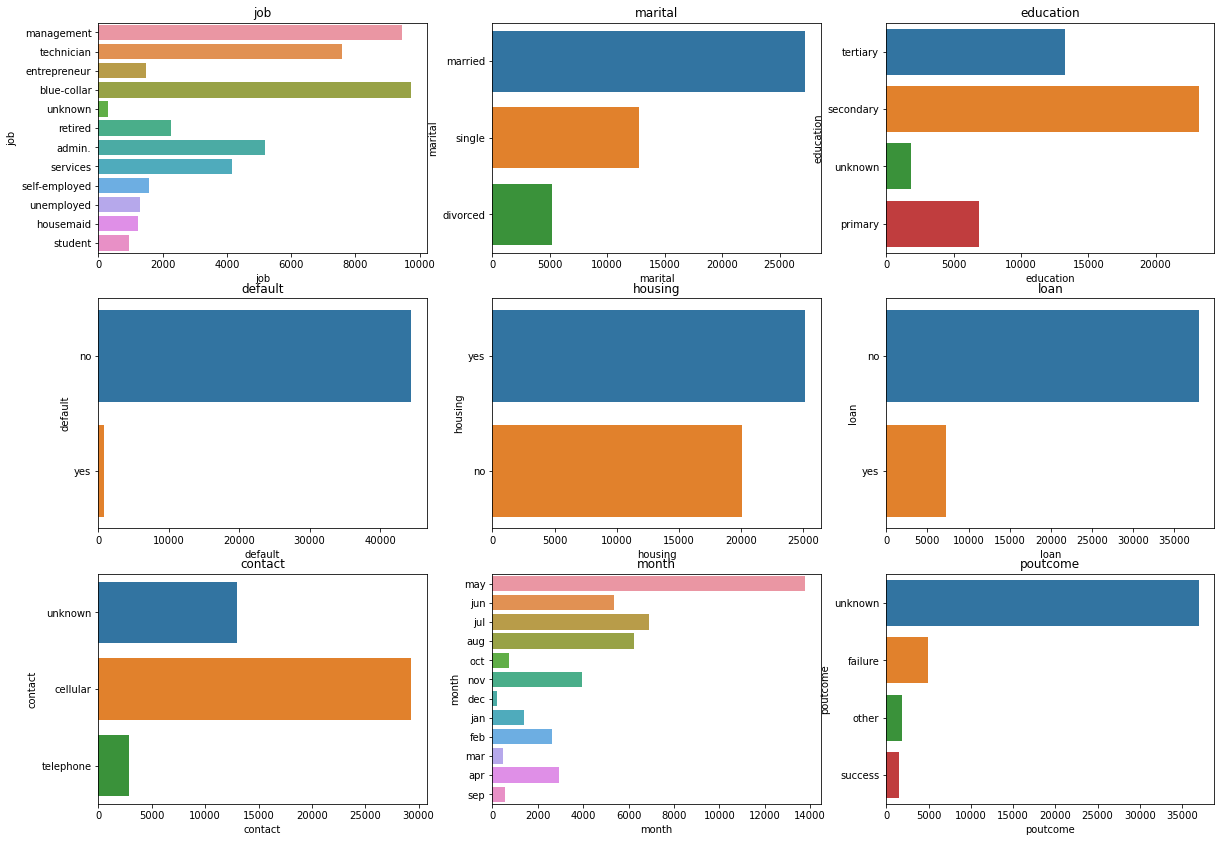

In [16]:
#check count based on categorical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for categorical_feature in cat_fe:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

In [17]:
#client who have management job records are high in db
#client who married are high in records and divorced are less
#client who's  education background  is secondary is high in record
##client who have cellular contact is high in record
#Contact have unknown rows more than telephone
#In month column there is more data in may month

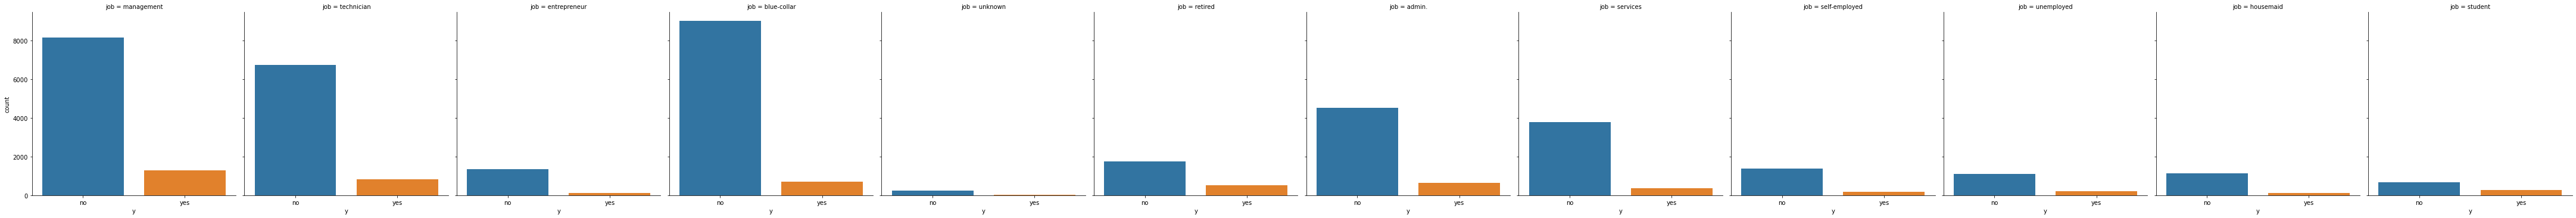

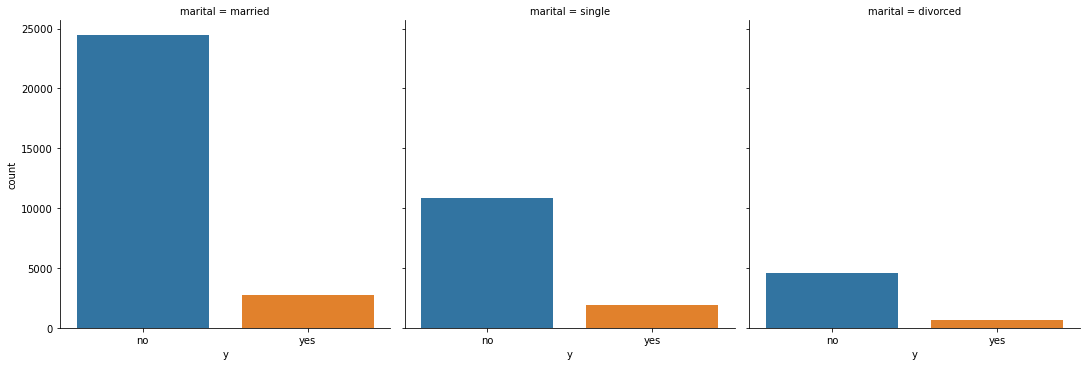

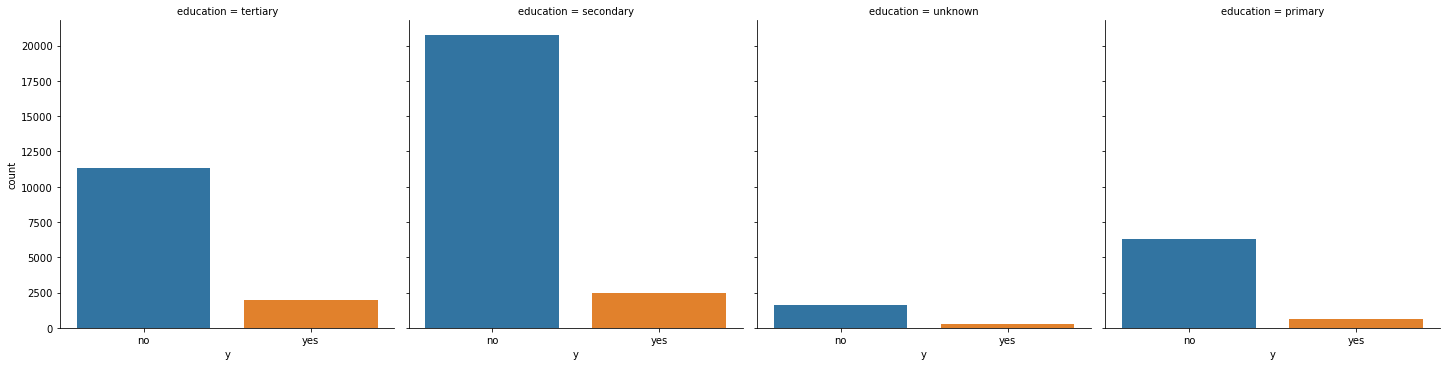

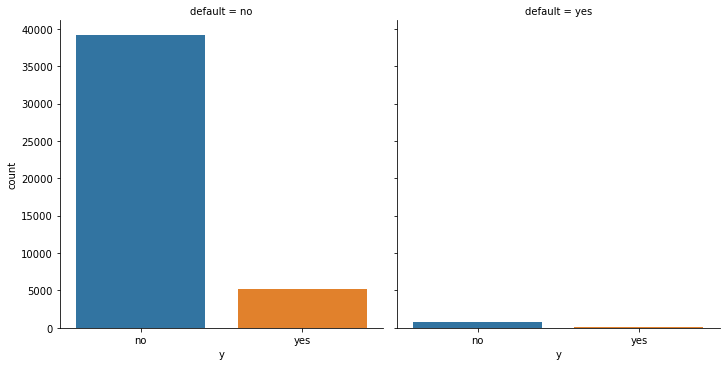

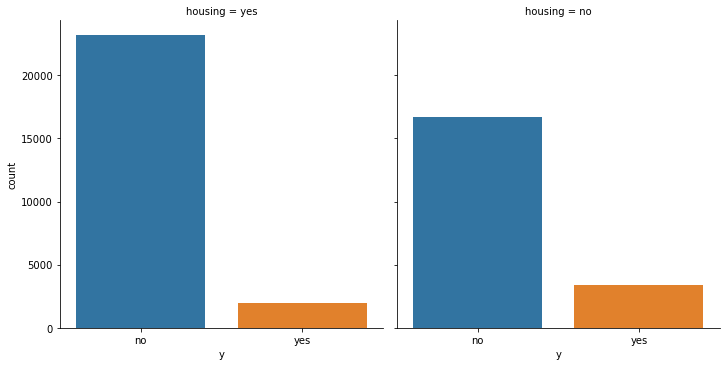

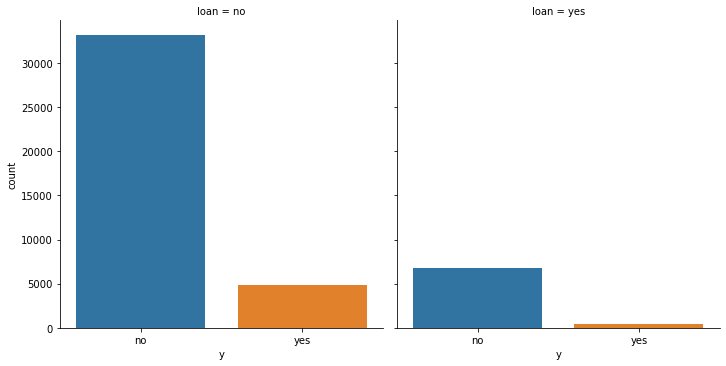

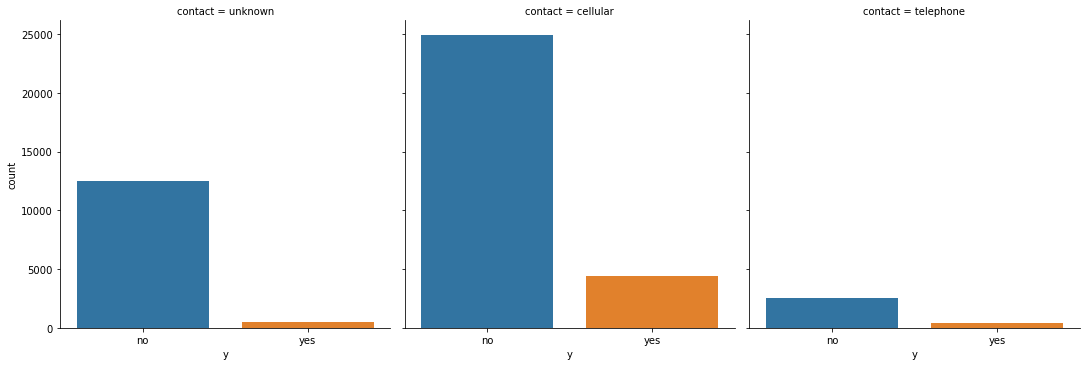

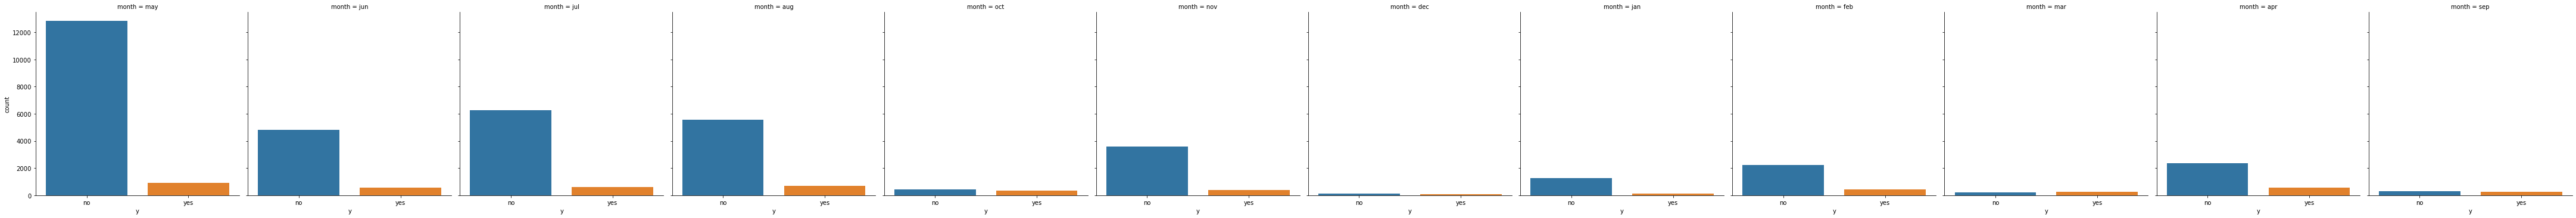

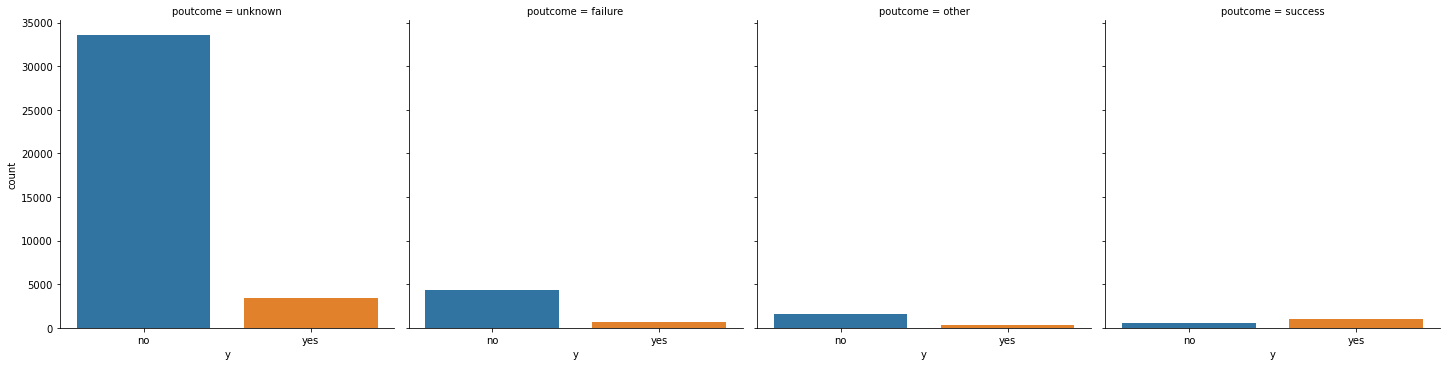

In [18]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in cat_fe:
    sns.catplot(x='y', col=categorical_feature, kind='count', data= df)
    plt.show()

In [19]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables:', len(numerical_features))
# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables: 7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [20]:
#There is no dicrete value innumerical column
#we find discrete feature which is less than 25
discrete_feature = [feature for feature in numerical_features if len(df[feature].unique())<25]
print("discrete variable :".format(len(discrete_feature)))

discrete variable :


In [21]:
#There is continuous val in numerical column
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


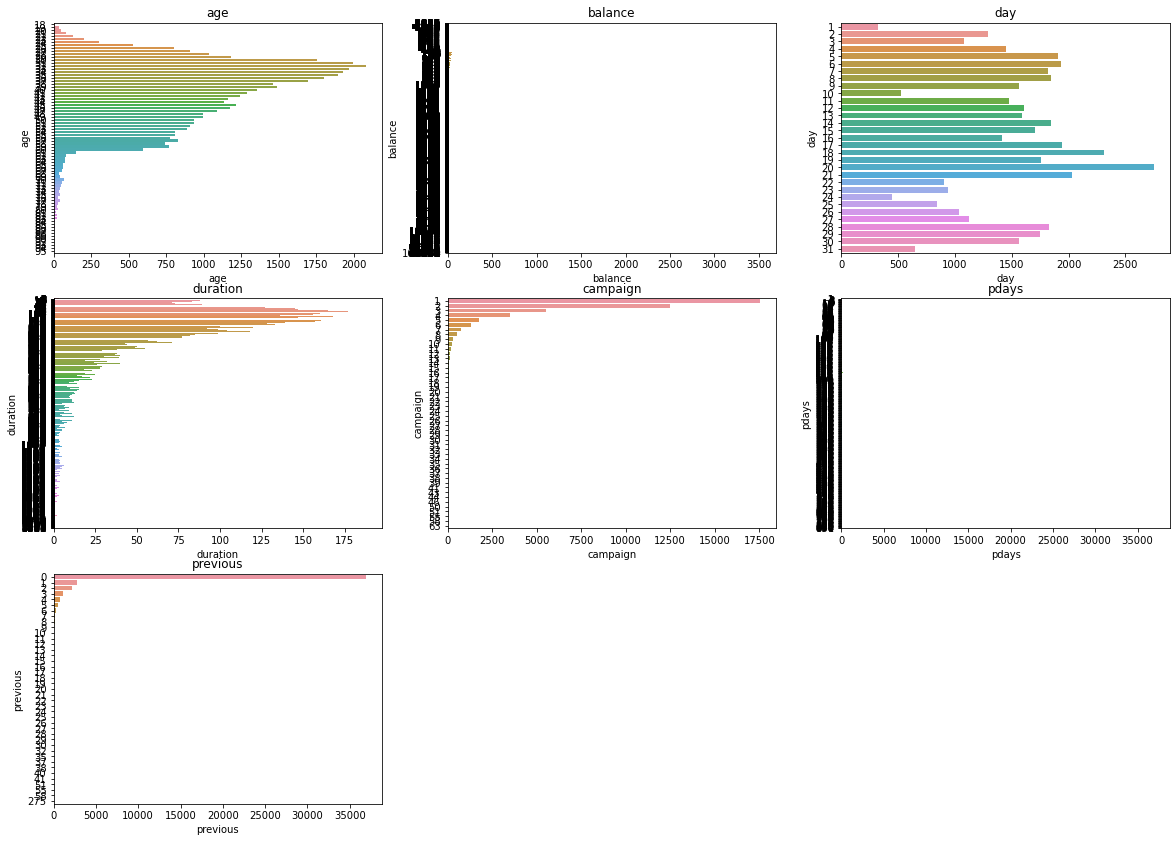

In [22]:
#check count based on continuous feature
#count plot won't  work here 
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=continuous_feature,data=df)
    plt.xlabel(continuous_feature)
    plt.title(continuous_feature)
    plotnumber+=1
plt.show()

C:\Users\Rohit Chavan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rohit Chavan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rohit Chavan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

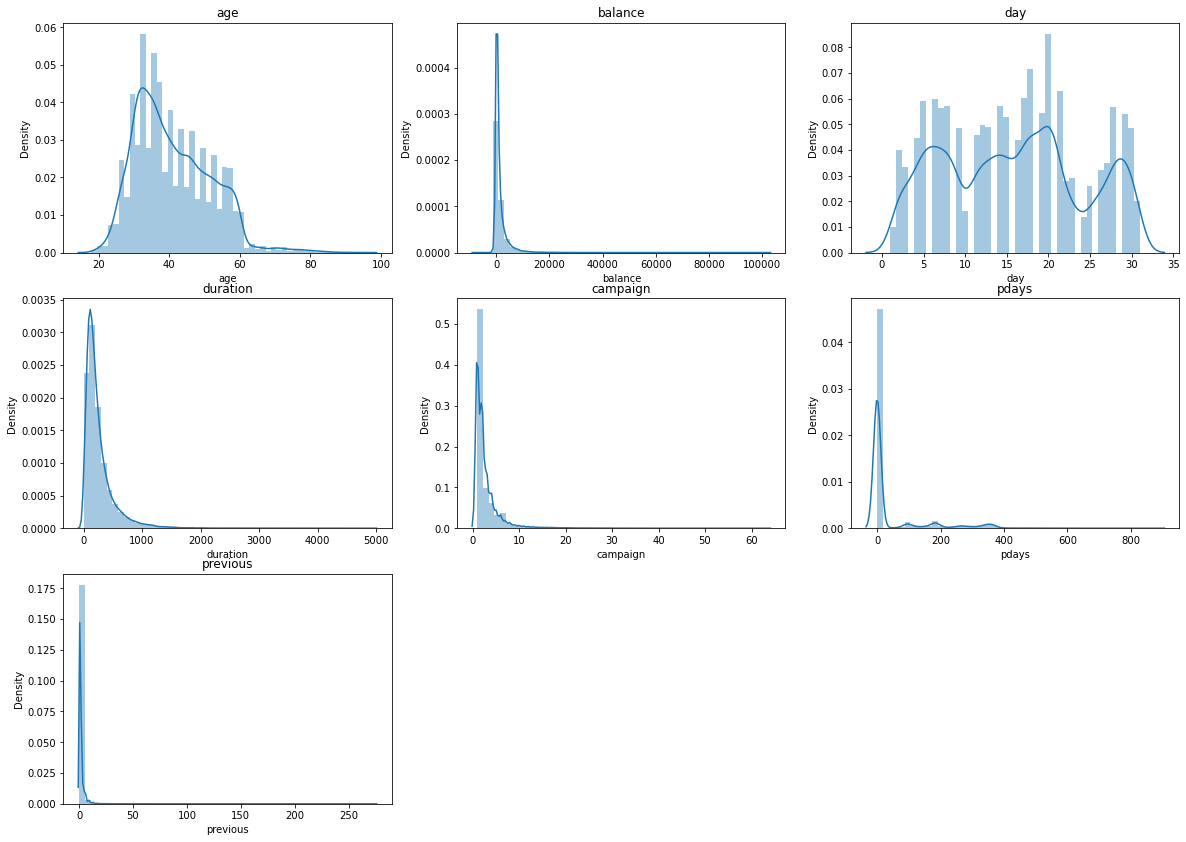

In [23]:
#check dist plot based on continuous feature
#
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plt.title(continuous_feature)
    plotnumber+=1
plt.show()

In [24]:
#Here age and day feature are normally distributed
#where balance, duraiton, campaign pday and previous skewed towards right, seems to be have an outlier there.

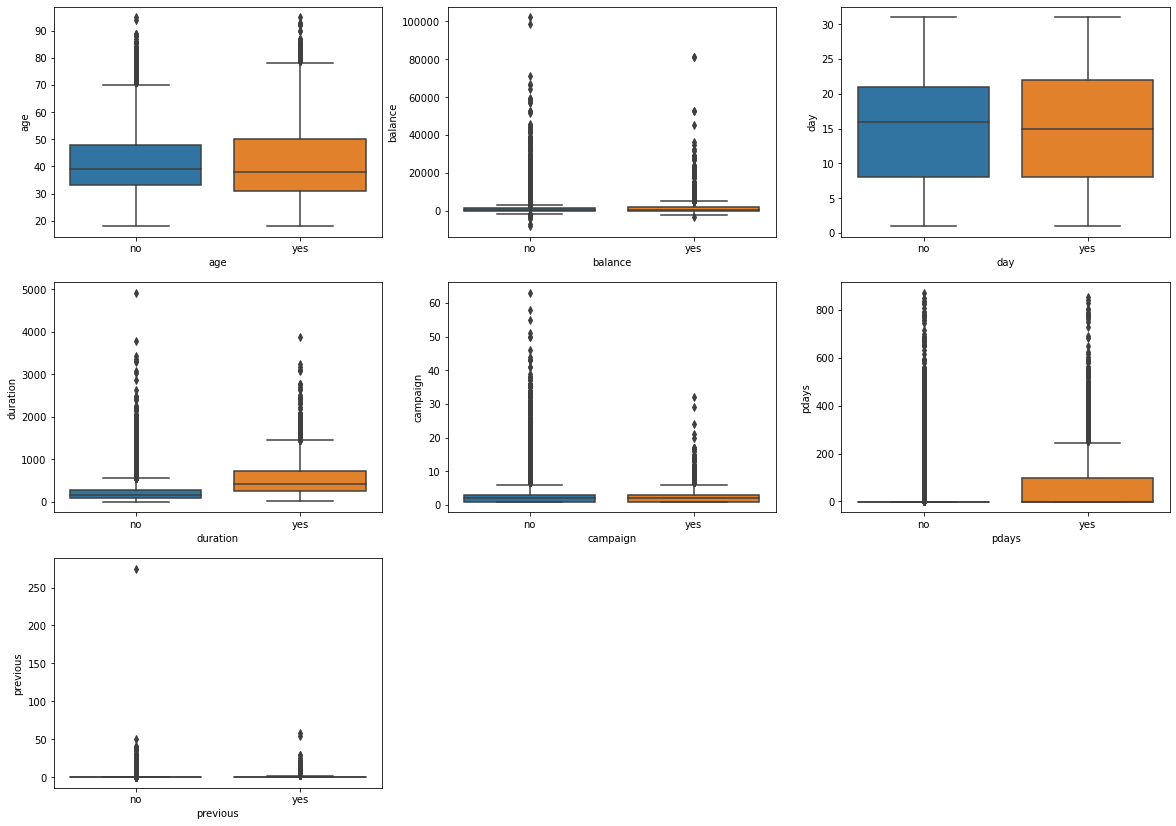

In [25]:
#check boxplot based on continuous feature
#To check an outlier
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x= 'y', y= df[feature],data =df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

In [26]:
#those client who take long duration on call they have interest in deposite 

In [27]:
#finding the outlier in all column we use boxplot here

C:\Users\Rohit Chavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rohit Chavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rohit Chavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\R

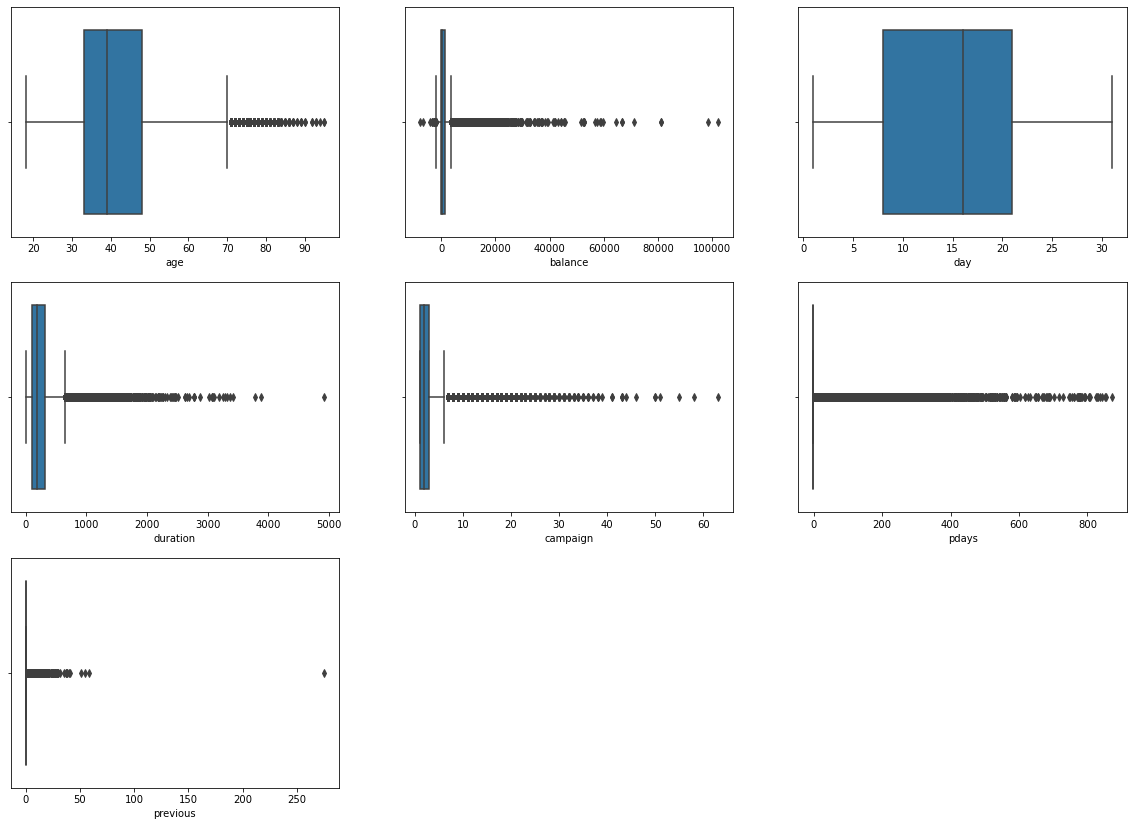

In [28]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature],data =df)
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

<AxesSubplot:>

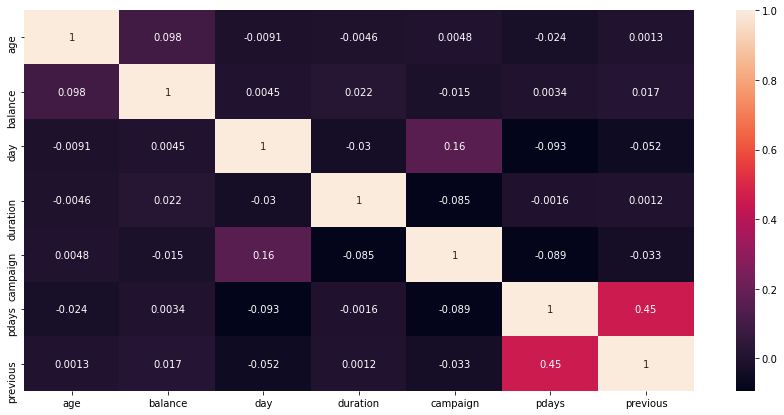

In [29]:
#correlation mmatrix for data
corr_df = df.corr()
fig = plt.figure(figsize =(15,7))
sns.heatmap(corr_df, annot =True)

In [30]:
#as we see on above relation there is no strong relation between features

In [31]:
df_train = df

In [32]:
target_count = df_train.y.value_counts()

In [33]:
print('Class yes:', target_count['yes'])
print('Class no:', target_count['no'])
print('Proportion:', round(target_count['yes'] / target_count['no'], 2), ': 1')

Class yes: 5289
Class no: 39922
Proportion: 0.13 : 1


In [34]:
# Class count
count_class_no, count_class_yes = df_train.y.value_counts()

# Divide by class
df_class_no = df_train[df_train['y'] == 'no']
df_class_yes = df_train[df_train['y'] == 'yes']

Random under-sampling:
no     5289
yes    5289
Name: y, dtype: int64


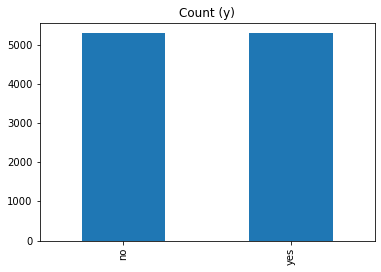

In [35]:
df_class_no_under = df_class_no.sample(count_class_yes)
df_test_under = pd.concat([df_class_no_under, df_class_yes], axis=0)

print('Random under-sampling:')
print(df_test_under.y.value_counts())

df_test_under.y.value_counts().plot(kind='bar', title='Count (y)');

In [36]:
df_test_under

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
28160,39,admin.,married,secondary,no,272,yes,yes,cellular,29,jan,199,1,234,2,failure,no
24762,34,technician,married,tertiary,no,7717,yes,no,cellular,18,nov,386,1,-1,0,unknown,no
35662,39,management,married,tertiary,no,3518,yes,no,cellular,8,may,440,1,-1,0,unknown,no
5405,30,blue-collar,married,secondary,no,2080,yes,no,unknown,23,may,466,2,-1,0,unknown,no
26431,31,blue-collar,single,tertiary,no,328,yes,no,cellular,20,nov,89,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [37]:


df_test_under['pdays'].value_counts()

-1      7826
 92      102
 182      92
 91       83
 181      83
        ... 
 579       1
 547       1
 531       1
 515       1
 603       1
Name: pdays, Length: 469, dtype: int64

In [38]:
df_test_under['pdays_no_contact'] = (df_test_under['pdays'] == -1)*1

contact = ({ 'cellular' : 0 ,'telephone' : 1 , 'unknown' : 2})
df_test_under['contact'] = df_test_under['contact'].map(contact)
            

In [39]:
df_test_under = pd.get_dummies(df_test_under,columns = ['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'month',
 'poutcome'], drop_first = True)

In [40]:
df_test_under

,age,balance,contact,day,duration,campaign,pdays,previous,y,pdays_no_contact,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
28160,39,272,0,29,199,1,234,2,no,0,...,0,0,0,0,0,0,0,0,0,0
24762,34,7717,0,18,386,1,-1,0,no,1,...,0,0,0,0,1,0,0,0,0,1
35662,39,3518,0,8,440,1,-1,0,no,1,...,0,0,0,1,0,0,0,0,0,1
5405,30,2080,2,23,466,2,-1,0,no,1,...,0,0,0,1,0,0,0,0,0,1
26431,31,328,0,20,89,1,-1,0,no,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,2850,0,17,300,1,40,8,yes,0,...,0,0,0,0,1,0,0,0,0,0
45205,25,505,0,17,386,2,-1,0,yes,1,...,0,0,0,0,1,0,0,0,0,1
45206,51,825,0,17,977,3,-1,0,yes,1,...,0,0,0,0,1,0,0,0,0,1
45207,71,1729,0,17,456,2,-1,0,yes,1,...,0,0,0,0,1,0,0,0,0,1


In [41]:
df_test_under.isnull().sum()

age                    0
balance                0
contact                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
y                      0
pdays_no_contact       0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0


In [42]:
df_test_under.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10578 entries, 28160 to 45208
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  10578 non-null  int64 
 1   balance              10578 non-null  int64 
 2   contact              10578 non-null  int64 
 3   day                  10578 non-null  int64 
 4   duration             10578 non-null  int64 
 5   campaign             10578 non-null  int64 
 6   pdays                10578 non-null  int64 
 7   previous             10578 non-null  int64 
 8   y                    10578 non-null  object
 9   pdays_no_contact     10578 non-null  int32 
 10  job_blue-collar      10578 non-null  uint8 
 11  job_entrepreneur     10578 non-null  uint8 
 12  job_housemaid        10578 non-null  uint8 
 13  job_management       10578 non-null  uint8 
 14  job_retired          10578 non-null  uint8 
 15  job_self-employed    10578 non-null  uint8 
 16  

In [43]:
from sklearn.model_selection import train_test_split
X = df_test_under.loc[:,df_test_under.columns != 'y']
y = df_test_under.loc[:,df_test_under.columns == 'y']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state =0 )

In [44]:
#lenght of train and test
print('Length of X train:',len(X_train),'Lenth of y train:',len(y_train))
print('Length of X test:',len(X_test),'Lenth of y test:',len(y_test))

Length of X train: 7404 Lenth of y train: 7404
Length of X test: 3174 Lenth of y test: 3174


In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)

C:\Users\Rohit Chavan\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [47]:
print('Train accuracy :' , clf.score(X_train,y_train))
print('Test accuracy :' , clf.score(X_test,y_test))


Train accuracy : 0.8379254457050244
Test accuracy : 0.8374291115311909


In [48]:
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1346,  222],
       [ 294, 1312]], dtype=int64)